# Khám phá thư viện sklearn - machine learning

`sklearn` là thư viện về machine learning phổ biến nhất của Python. Nó viết sẵn các thuật toán lằng nhằng phức tạp, bạn chỉ việc nhét dữ liệu vào, chờ nó tính toán rồi lấy kết quả, dễ như ăn kẹo.

Bài này thừa nhận rằng bạn có biết đọc code Python.
Ta tập trung vào: kiến thức về xử lý dữ liệu, machine learning và sử dụng sklearn. Nếu bạn không biết cả 3 thứ này, học cả 3 cùng lúc sẽ rất mệt và không hiệu quả. 


In [228]:
import sklearn
import sys

print("Python version: {}".format(sys.version))
print("sklearn version: {}".format(sklearn.__version__))

Python version: 3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
sklearn version: 0.19.0


## Dữ liệu và các thuộc tính 

`sklearn` có sẵn các bộ dữ liệu thường được dùng trong nghiên cứu.
Lấy danh sách các bộ dữ liệu có sẵn trong `sklearn` bằng code Python

In [189]:
import sklearn.datasets
list_of_data_funcs = [s for s in dir(sklearn.datasets) if s.startswith('load')]
list_of_data_funcs, len(list_of_data_funcs)

(['load_boston',
  'load_breast_cancer',
  'load_diabetes',
  'load_digits',
  'load_files',
  'load_iris',
  'load_linnerud',
  'load_mlcomp',
  'load_sample_image',
  'load_sample_images',
  'load_svmlight_file',
  'load_svmlight_files',
  'load_wine'],
 13)

## Hoa Iris
Bộ dữ liệu về các giống hoa Iris, được dùng làm ví dụ với các thuật toán phân loại (classification) - dự đoán giống hoa dựa trên kích thước của hoa.

In [231]:
iris = sklearn.datasets.load_iris()

type(iris)

sklearn.utils.Bunch

Chi tiết về kiểu Bunch: `help(sklearn.utils.Bunch)`

```
sklearn.utils.Bunch(**kwargs)
Docstring:     
Container object for datasets

Dictionary-like object that exposes its keys as attributes.
```

In [192]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [193]:
type(iris.data)

numpy.ndarray

In [194]:
iris.data.shape # 150 rows (samples), 4 columns (features)

(150, 4)

In [195]:
iris.target.shape # 150 x 1

(150,)

In [196]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [197]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3 giống hoa Iris 
- 0: setosa
- 1: versicolor
- 2: virginica

In [198]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [199]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

Dữ liệu có 4 thuộc tính (feature)
- chiều dài sepal (cm)
- chiều rộng sepal 
- chiều dài petal 
- chiều rộng petal 


### Mục đích bài toán
Dựa vào chiều dài và chiều rộng của sepal (đài hoa) /ˈsɛp(ə)l/ kết hợp với chiều dài và rộng của petal (cánh hoa) /ˈpɛt(ə)l/ để phân loại các giống hoa Iris.

## Khám phá dữ liệu
Dữ liệu đã có sẵn, giờ chỉ cần xoay đi, xoay lại, lộn lên lộn xuống xem dữ liệu có ý nghĩa gì. 
Đây là bước cơ bản khi phân tích mọi thứ, và thường ta sẽ vẽ hình để nhìn cho dễ.

Một điều dễ gây "ảo tưởng" của những người học ML là ta luôn bắt đầu với bước này!!!
Sự thật là:
- không phải lúc nào cũng có sẵn dữ liệu - ta có thể phải tự thu thập dữ liệu
- dữ liệu gần như không bao giờ sạch sẽ như ví dụ này: sẽ có thông tin bị thiếu, bị lệch về độ lớn, sai ...

Nên phần "tiền xử lý" - làm sạch dữ liệu, trên thực tế, mới là phần mà người làm dữ liệu tốn nhiều thời gian. Nếu không thành thạo phần làm sạch / thu thập dữ liệu này thì chẳng có dữ liệu nào mà phân tích hay ML cả.

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline

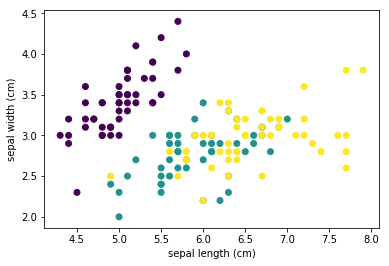

In [201]:
x_feature = 0
y_feature = 1
x_column = iris.data[:, x_feature] # lấy tất cả các dòng của cột x_feature(0)
y_column = iris.data[:, y_feature]
plt.scatter(x_column, y_column, c=iris.target)
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

Mọi hàm vẽ trên `matplotlib` đều đơn giản như thế, chỉ cần đưa vào số liệu trục x, truc y, thế là xong. Các argument khác sẽ làm thêm màu mè hay tùy chỉnh chi tiết nhưng về cơ bản chỉ có vậy.

### Câu hỏi
#### Hình trên chỉ vẽ dữ liệu 2 chiều (2 features của sample), nếu dữ liệu có nhiều chiều thì sao? 

Ở ví dụ Iris này ta có 4 features, ta không thể vẽ ra không gian 4 chiều rồi nhìn vào đó. Con người chỉ có khả năng quan sát dữ liệu 2 chiều (2D) hay 3 chiều (3D), vì vậy sẽ phải chọn ra 2 hay 3 features rồi vẽ. Việc lựa chọn này hoàn toàn phụ thuộc vào người phân tích, phụ thuộc họ muốn thấy mối liên hệ giữa những đại lượng nào.

#### Dữ liệu có 1000 features thì sao?

Ta có thể có hàng trăm, hay hàng nghìn số liệu để mô tả một ngôi nhà, nhưng không phải feature nào cũng có nhiều ý nghĩa đối với giá của ngôi nhà. Số phòng ngủ hay phòng vệ sinh hẳn quan trọng hơn chiều rộng và chiều cao của cửa sổ. Lựa chọn những features có quan hệ với kết quả cũng là việc của người làm phân tích. Việc này trên thực tế không quá phức tạp, nhờ những phương pháp toán học và công cụ có sẵn giúp ta chọn ra những feature (feature selecting) có ảnh hưởng nhất.

Khi `sklearn` đã có sẵn các thuật toán, việc còn lại của người phân tích sẽ là làm sạch dữ liệu, lựa chọn thuật toán tốt nhất, cho kết quả đúng nhất. Phân tích tỷ lệ sai là bao nhiêu? và sai thì làm sao? 

99% có phải 1 độ chính xác cao khi nhận diện chữ viết? 99% nghe hẳn là rất cao!
Nhưng nếu ta có 1 triệu văn bản cần nhận diện, sẽ có bao nhiêu văn bản bị sai?

In [202]:
10**6 - 10**6 * 99 / 100

10000.0

10.000 văn bản bị sai. Với 10 nghìn văn bản sai, bạn sẽ phải ngồi lần lại 1 triệu văn bản để tìm ra cái nào sai... vậy cuối cùng việc 99% đúng kia có giúp ích gì? thà ta làm thủ công toàn bộ còn hơn!

Nếu Facebook.com có khả năng nhận diện khuôn mặt của bạn đúng 99% thì sao? Thì chả sao cả, nó sẽ tag đúng bạn, hoặc có tag sai 1 trong 100 bức ảnh thì bạn tự chỉnh lại cho đúng, không ai làm sao, cũng không ai mất gì.

Vậy là cùng 99%, nhưng tùy vào bài toán, yêu cầu cụ thể, mà nó mang ý nghĩa khác nhau.

## Estimator

Mọi thuật toán có sẵn trong `sklearn` đều biểu diễn bằng một object "Estimator".
Một vài thuật toán cơ bản:
- Linear Regression: dự đoán quan hệ bằng 1 đường thẳng
- Logistic Regression: phân nhóm bằng 1 đường thẳng
- ...

In [203]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [204]:
model = LinearRegression()

In [205]:
logistic_model = LogisticRegression()

Khi đã có estimator (model) rồi, chỉ còn 2 thao tác phải làm:
- train/fit với dữ liệu đã có, để estimator chỉnh tham số cho phù hợp với mô hình
- predict với dữ liệu mới, để đưa ra kết quả (dự đoán giá, chia nhóm 1 nhóm 2)

## Một bài toán Linear Regression đơn giản 
- 1 quả chuối - giá 2000
- 2 quả chuối - giá 4000
- 9 quả chuối - giá 18000

Hỏi 5 quả chuối gía bao nhiêu tiền? 
Cứ xem như ta không biết phép tính nhân, hãy dùng Linear Regression để giải.

In [206]:
import numpy as np

In [207]:
X = np.array([1,2,9])
Y = np.array([1000, 4000, 18000])

In [208]:
X, Y

(array([1, 2, 9]), array([ 1000,  4000, 18000]))

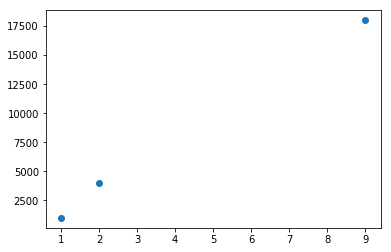

In [209]:
plt.plot(X, Y, 'o')

Dữ liệu có: 1 feature (số lượng quả chuối), và 3 trường hợp (1 quả , 2 quả, 9 quả), vậy nên biểu diễn bằng ma trận 3 hàng 1 cột để `sklearn` xử lý - đây cũng là dạng tiêu chuẩn để nhét dữ liệu vào `sklearn`. Biến đổi dạng hàng (1x3) thành dạng cột (3x1):

In [210]:
X = X.reshape((3, 1));
print(X)

[[1]
 [2]
 [9]]


Tương tự, kết quả cũng cần viết ở dạng cột:

In [211]:
Y = Y.reshape((-1, 1)) #-1 nếu ta muốn numpy tự tính số dòng
print(Y)

[[ 1000]
 [ 4000]
 [18000]]


In [212]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Vậy là đã "fit/train" xong. Giờ chỉ việc dự đoán, giả sử cần tính giá của 5, 6, 50 quả chuối:

In [213]:
questions = np.array([5, 6, 50]).reshape((-1, 1))
print(questions)

[[ 5]
 [ 6]
 [50]]


In [214]:
model.predict(questions)

array([[   9745.61403509],
       [  11824.56140351],
       [ 103298.24561404]])

Kết quả có vẻ không chính xác tuyệt đối, nhưng gần gần với kết quả khi ta làm tính nhân: 10000, 12000 và 100000.

Việc ghi giá tiền 1000 VNĐ là có ý nghĩa với người xem kết quả, nhưng lại chỉ là một con số to khiến cho việc tính toán trở nên phức tạp hơn. Ta có thể giảm nó đi 1000 lần mà không ảnh hưởng gì đến kết quả, đồng thời giúp tính toán nhanh - việc làm này gọi là feature scaling.

In [215]:
Y = Y/1000.0

In [216]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
model.predict(questions)

array([[   9.74561404],
       [  11.8245614 ],
       [ 103.29824561]])

Làm sao để có kết quả đúng hơn? 

Với 3 điểm dữ liệu, thuật toán chưa đủ để tìm ra quy luật, với nhiều dữ liệu hơn, thuật toán sẽ làm việc chính xác hơn:

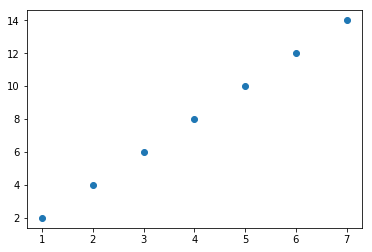

In [218]:
X = np.array([1,2,3,4,5,6,7])
Y = np.array([2000, 4000, 6000, 8000, 10000, 12000, 14000])/1000.0
plt.plot(X, Y, 'o')

In [219]:
X = X.reshape(-1, 1)
print(X)
Y = Y.reshape(-1, 1)
print(Y)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[[  2.]
 [  4.]
 [  6.]
 [  8.]
 [ 10.]
 [ 12.]
 [ 14.]]


In [220]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [221]:
model.predict(questions)

array([[  10.],
       [  12.],
       [ 100.]])

Kết quả ở đây chính xác 100%, đúng như mong đợi. 

Trên thực tế, hầu hết các mối quan hệ đầu vào đầu ra (dữ liệu/kết quả) không ở dạng biểu diễn được bằng 1 đường thẳng, nên ta sẽ cần nhiều thuật toán khác.

## Phân loại giống hoa bằng kNN 

Ta cần phân loại các giống hoa iris, vì vậy ta sẽ lấy các thuật toán phân loại ra để dùng, mặc dù chưa cần hiểu nó làm thế nào. kNN - k nearest neighbor là thuật toán đơn giản nhất, hãy thử xem:

In [222]:
from sklearn import neighbors

In [223]:
knn = neighbors.KNeighborsClassifier()

In [224]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Nhìn output trên, thấy KNN có thể nhận vào các đầu vào khác nhau, nhưng ở đây do 
ta chưa biết kNN có những tham số tùy chỉnh nào nên ta cứ dùng mặc định.

In [225]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [226]:
label = knn.predict([[1,1,1,1]])
print(label, iris.target_names[label])

l2 = knn.predict([[4,5,6,7]])
print(l2, iris.target_names[l2])

[0] ['setosa']
[2] ['virginica']


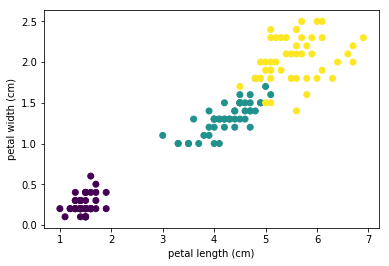

In [227]:
x_feature = -2 # index âm, lấy cột thứ 2 từ phải sang
y_feature = -1 # lấy cột cuối cùng
plt.scatter(iris.data[:, x_feature], iris.data[:, y_feature], c=iris.target)
plt.xlabel(iris.feature_names[x_feature])
plt.ylabel(iris.feature_names[y_feature])

Kết quả phân loại dự đoán nếu một bông hoa có 4 kích thước là 1,1,1,1 thì nó thuộc nhóm số 0 - hay có tên "setosa".

# Kết luận
Bài viết này đã
- Giới thiệu về việc lấy dữ liệu có sẵn trong sklearn 
- Xem xét các tính chất của những bộ dữ liệu này 
- Vẽ hình minh họa để khám phá bộ dữ liệu 
- Đơn giản bài toán bằng cách giảm kích thước dữ liệu - feature scaling
- Tạo Estimator và sử dụng nó để "làm machine learning" với .fit() và .predict()
  mà không quan tâm đến thuật toán mình đang sử dụng

Khi toàn bộ việc tính toán đã có `sklearn` lo, thì ta chỉ cần ăn no và giải thích kết quả - dễ như ăn kẹo ha??!!!

# Tham khảo
- http://www.scipy-lectures.org/packages/scikit-learn/index.html

# Đọc thêm
- Giới thiệu tổng quan về Machine Learning: http://www.familug.org/2016/01/ml-gioi-thieu-machine-learning.html
- Chi tiết hơn về Linear Regression: https://medium.com/pymi/%C4%91o%C3%A1n-gi%C3%A1-chu%E1%BB%91i-tr%C3%AAn-th%E1%BB%8B-tr%C6%B0%E1%BB%9Dng-v%E1%BB%9Bi-thu%E1%BA%ADt-to%C3%A1n-ml-linear-regression-d34a880dd139
